In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.datasets import fashion_mnist 
from keras.datasets import mnist 

(train_X,train_Y), (test_X,test_Y) = mnist.load_data()
#(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


In [3]:
def display_image(image_array):
    
    plt.imshow(np.reshape(image_array,[28,28]), interpolation='nearest', cmap='binary')
    plt.show()

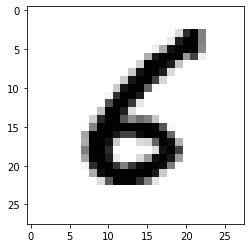

In [4]:
idx = np.random.randint(len(train_X))
display_image(train_X[idx,:])

In [5]:
trian_X_vectors = np.reshape(train_X,[len(train_X),28*28])
trian_X_vectors = trian_X_vectors.astype(float)
trian_X_vectors -= trian_X_vectors.mean(axis=0)
trian_X_vectors.shape

covariance_matrix = np.dot(np.transpose(trian_X_vectors), trian_X_vectors)
eig_val, eig_vec  = np.linalg.eig(covariance_matrix)

### Plot first eigenvectors of PCA

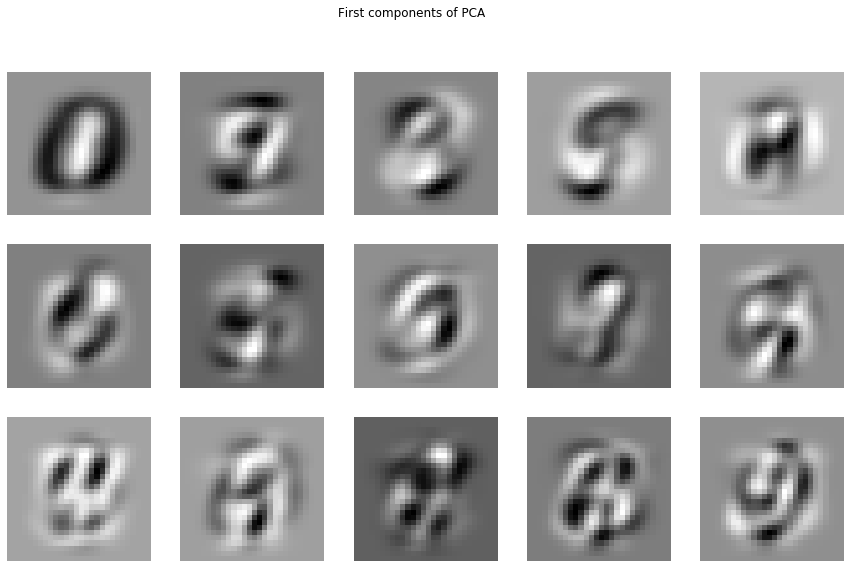

In [6]:
fig, axs = plt.subplots(3,5, figsize = (15,9))
fig.suptitle('First components of PCA')

for idx, ax in enumerate(axs.flatten()):
    ax.imshow(np.reshape(-eig_vec[:,idx],[28,28]), interpolation='nearest', cmap='binary')
    ax.axis('off')

### Write digit using first N eigen vectors

In [7]:
def digit_decomposition(digit, eigen_vec, terms=10):
       
    return np.dot(digit, eigen_vec)[:terms]

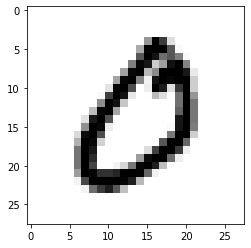

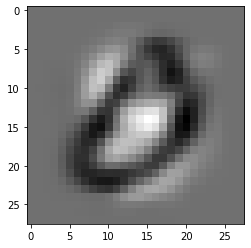

In [13]:
idx = np.random.randint(len(train_X))
display_image(train_X[idx,:])

digit_decomp = digit_decomposition(trian_X_vectors[idx], eig_vec, 25)
a = (digit_decomp * eig_vec[:,:len(digit_decomp)])
display_image(a.sum(axis=1))

In [ ]:
digit_decomposition(trian_X_vectors[:1], eig_vec, 2)

### Clusters with values of first two components of image.